In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

%matplotlib inline

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
x_train shape: (60000, 28, 28, 1)


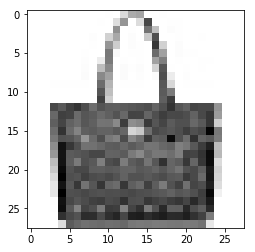

In [7]:
plt.imshow(x_train[768,:,:], cmap='Greys')
print(type(x_train))
print(x_train.shape)
print(y_train.shape)

#reshaping to add the channel dim
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1], x_train.shape[2], 1))
# y_train = y_train.reshape((y_train.shape[0],y_train.shape[1], y_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1], x_test.shape[2], 1))
# y_test = y_test.reshape((y_test.shape[0],y_test.shape[1], y_test.shape[2], 1))

print("x_train shape: {}".format(x_train.shape))

In [8]:
model = tf.keras.models.Sequential([
#         tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(kernel_size=[5,5], filters=32, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=[5,5], filters=64, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

tensorboard = TensorBoard(log_dir=r"logs\{}".format(time()))

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=512, epochs=5, validation_split=0.0, callbacks=[tensorboard])
model.evaluate(x_test, y_test)

W0705 03:08:32.757917 140059082741632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.6709 - acc: 0.7593
Epoch 2/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4000 - acc: 0.8570
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3355 - acc: 0.8793
Epoch 4/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3011 - acc: 0.8905
Epoch 5/5
10000/10000 [==============================] - 1s 53us/sample - loss: 0.2917 - acc: 0.8956


[0.2916752942323685, 0.8956]

In [0]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(v_xs, v_ys):
    cls_true = v_ys
    cls_pred = np.argmax(model.predict(v_xs), axis=1).T
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    plt.figure()
#     plt.subplot(121)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Print the confusion matrix as text.
#     print(cm)
    # Plot the confusion matrix as an image.

10000/10000 [==============================] - 0s 46us/sample
prediction for this image: 4


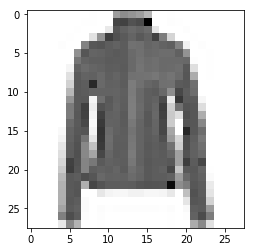

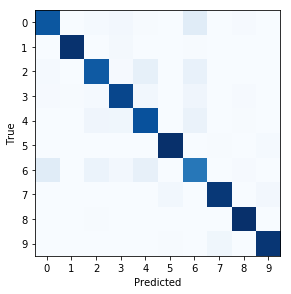

In [10]:
img_no = 1234

plt.figure()
plt.imshow(x_test[img_no,:,:,0], cmap='Greys')
pred = np.argmax(model.predict(x_test, batch_size=None, verbose=1), axis=1)[img_no]
print("prediction for this image: {}".format(pred))

print_confusion_matrix(x_test, y_test.reshape((-1, 1)))